## 图像处理教程

基本的图像处理教程

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 旋转图片

type: <class 'numpy.ndarray'>


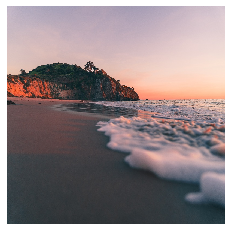

In [3]:
# 读取图片
img = cv2.imread('example.jpg')
print(f'type: {type(img)}')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
# 获取图片的宽、高
height, width = img.shape[:2]
print(height, width)

800 800


rotation image shape:(800, 800, 3)


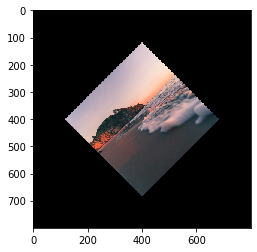

In [5]:
rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), 45, .5)
rotationImage = cv2.warpAffine(img, rotationMatrix, (width, height))
print(f'rotation image shape:{rotationImage.shape}')
plt.imshow(cv2.cvtColor(rotationImage, cv2.COLOR_BGR2RGB))

### 2. 裁剪图片

origin image shape:(800, 800, 3)
crop image shape:(560, 560, 3)


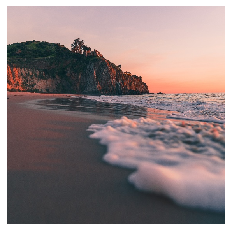

In [6]:
img = cv2.imread('example.jpg')
height, width = img.shape[:2]
print(f'origin image shape:{img.shape}')
# 设置裁剪后图片的大小
start_row = int(height * 0.15)
start_col = int(width * 0.15)
end_row = int(height * 0.85)
end_col = int(width * 0.85)
# 裁剪图片
cropped_image = img[start_row:end_row, start_col:end_col]
print(f'crop image shape:{cropped_image.shape}')
plt.axis('off')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### 3. 调整图片大小

origin image shape:(800, 800, 3)
new img shape:(600, 600, 3)


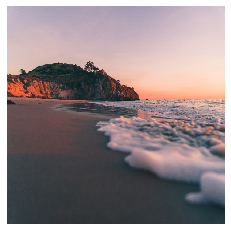

In [7]:
img = cv2.imread('example.jpg')
height, width = img.shape[:2]
print(f'origin image shape:{img.shape}')
# 1
new_img = cv2.resize(img, (0, 0), fx=0.75, fy=0.75)
print(f'new img shape:{new_img.shape}')
plt.axis('off')
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

new img shape:(800, 800, 3)


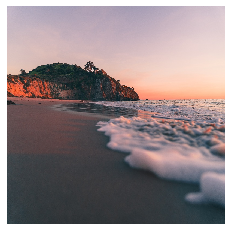

In [8]:
# 2
new_img = cv2.resize(img, (800, 800))
print(f'new img shape:{new_img.shape}')
plt.axis('off')
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

### 4. 调整图片对比度

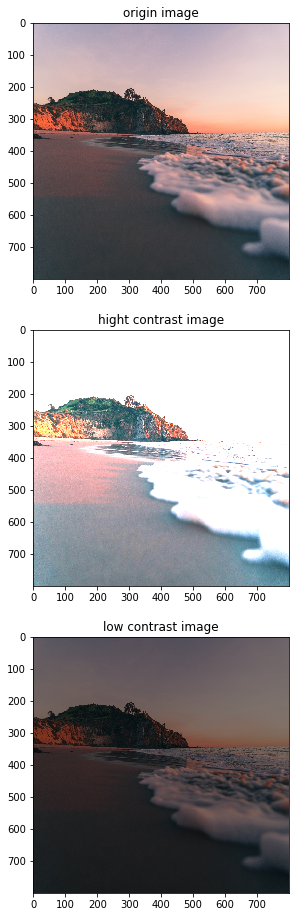

In [9]:
import numpy as np
img = cv2.imread('example.jpg')
hight_contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)
low_contrast_img = cv2.addWeighted(img, 0.5, np.zeros(img.shape, img.dtype), 0, 0)
plt.figure(figsize=(32, 16))
plt.subplot(3, 1, 1)
plt.title('origin image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(3, 1, 2)
plt.title('hight contrast image')
plt.imshow(cv2.cvtColor(hight_contrast_img, cv2.COLOR_BGR2RGB))
plt.subplot(3, 1, 3)
plt.title('low contrast image')
plt.imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB))

### 5.模糊图片

#### 5.1 高斯模糊

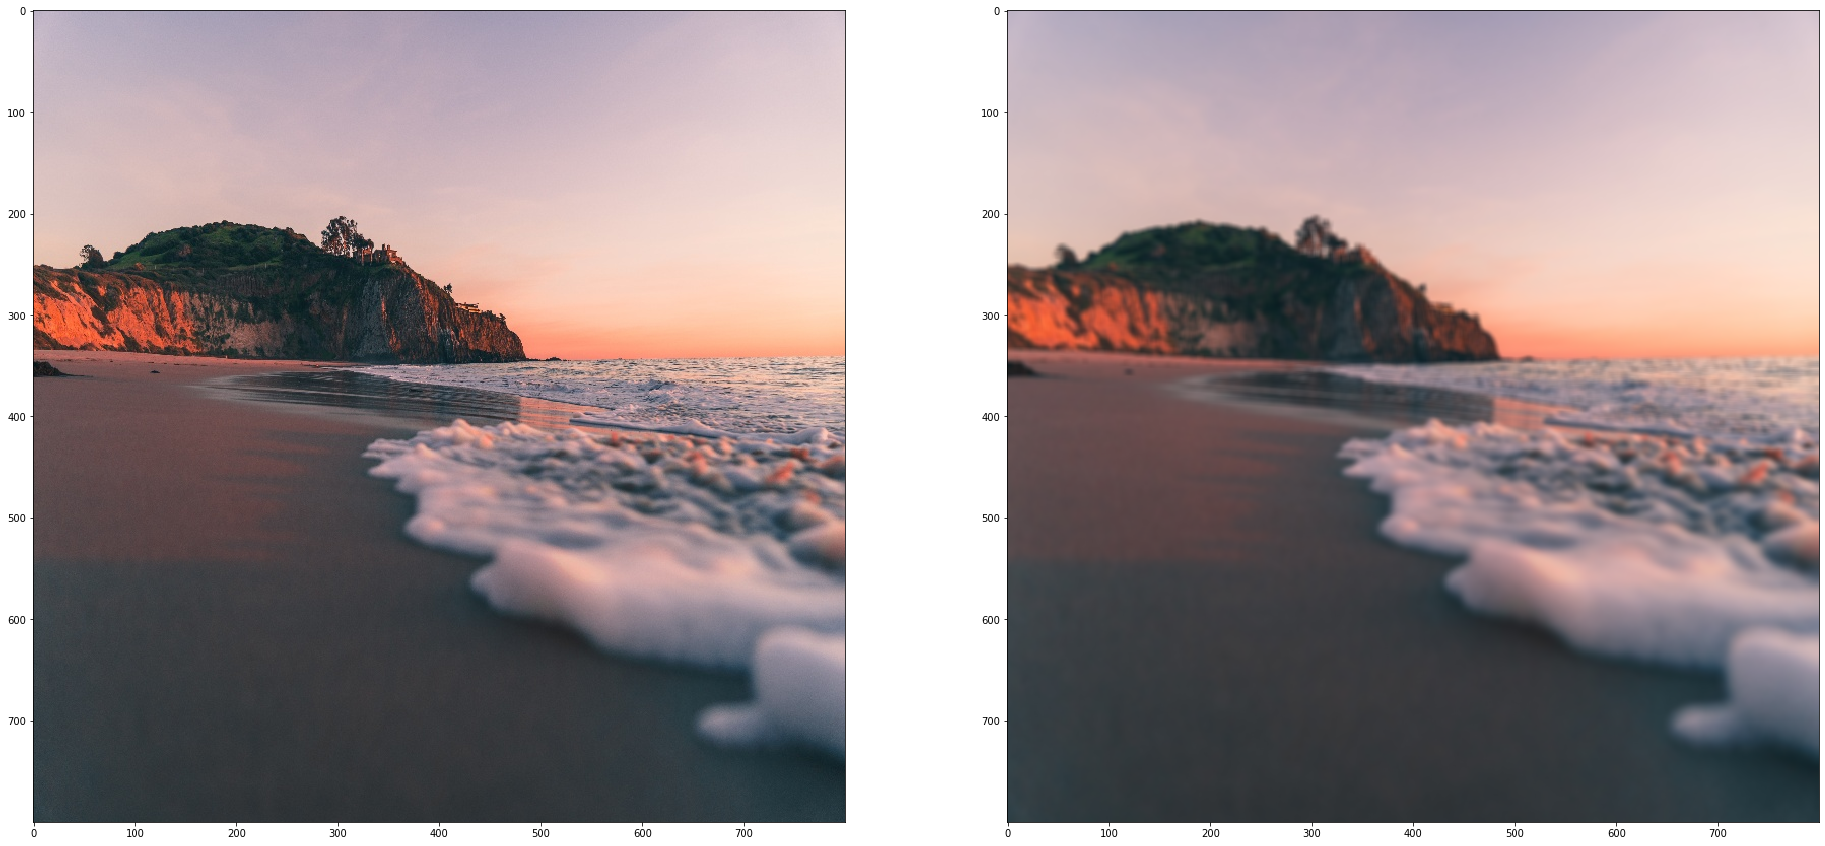

In [10]:
img = cv2.imread('example.jpg')
blur_img = cv2.GaussianBlur(img, (7, 7), 3)
plt.figure(figsize=(32, 32))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB))

#### 5.2 中值滤波

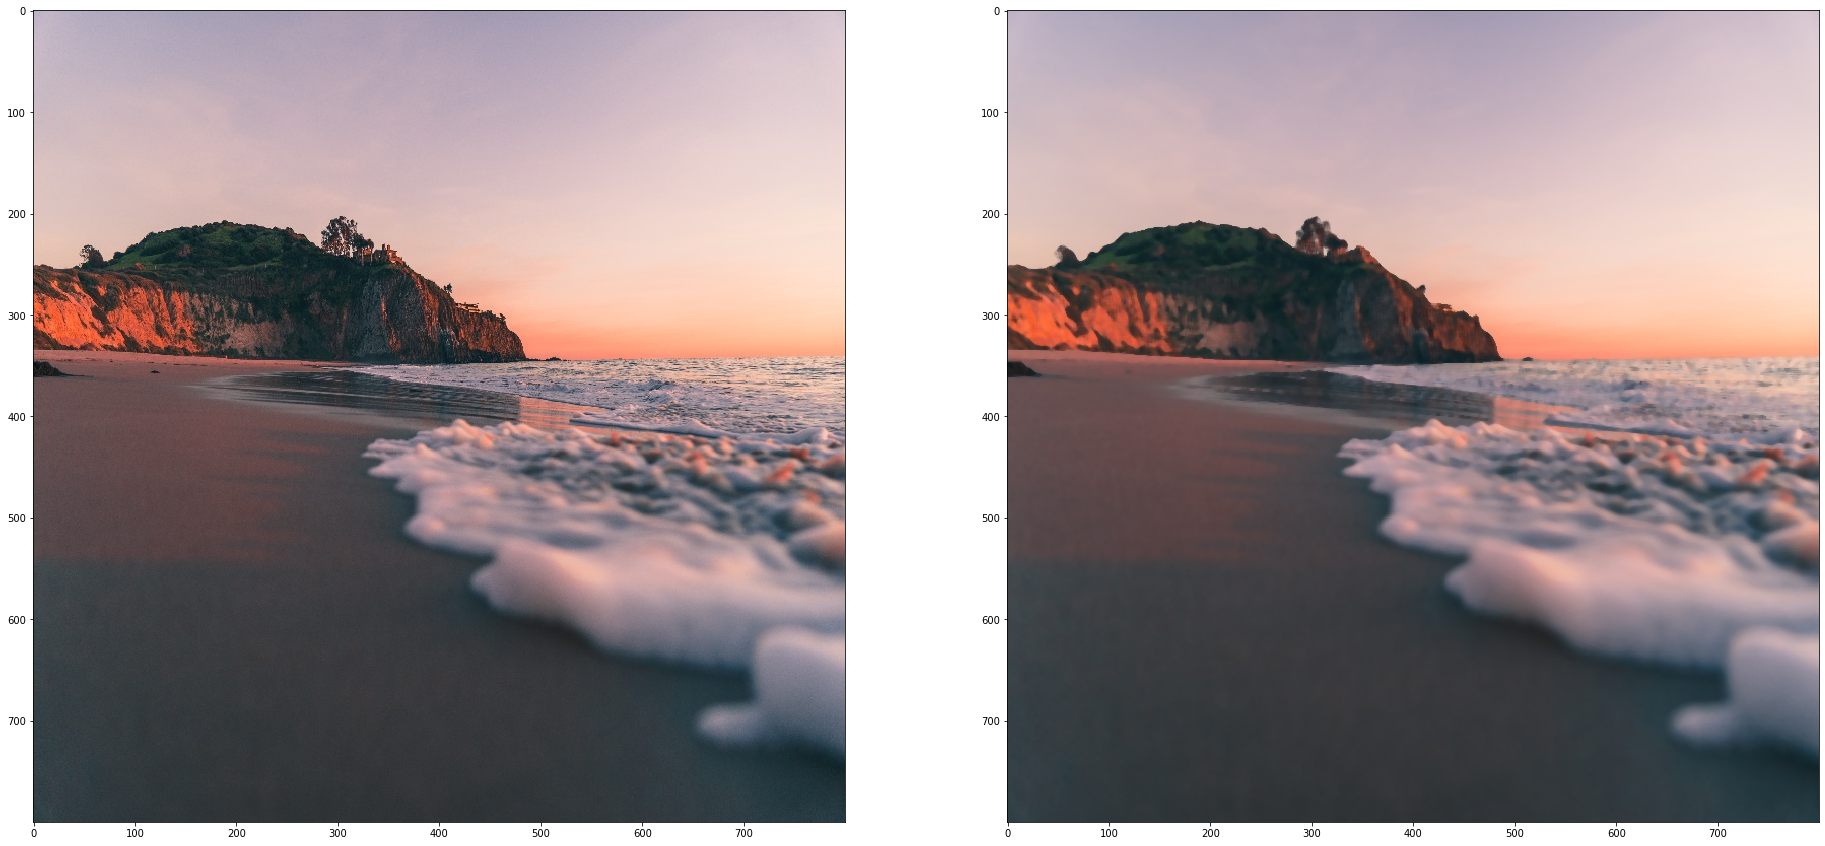

In [11]:
img = cv2.imread('example.jpg')
blur_img = cv2.medianBlur(img, 5)
plt.figure(figsize=(32, 32))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB))

### 6.边缘检测

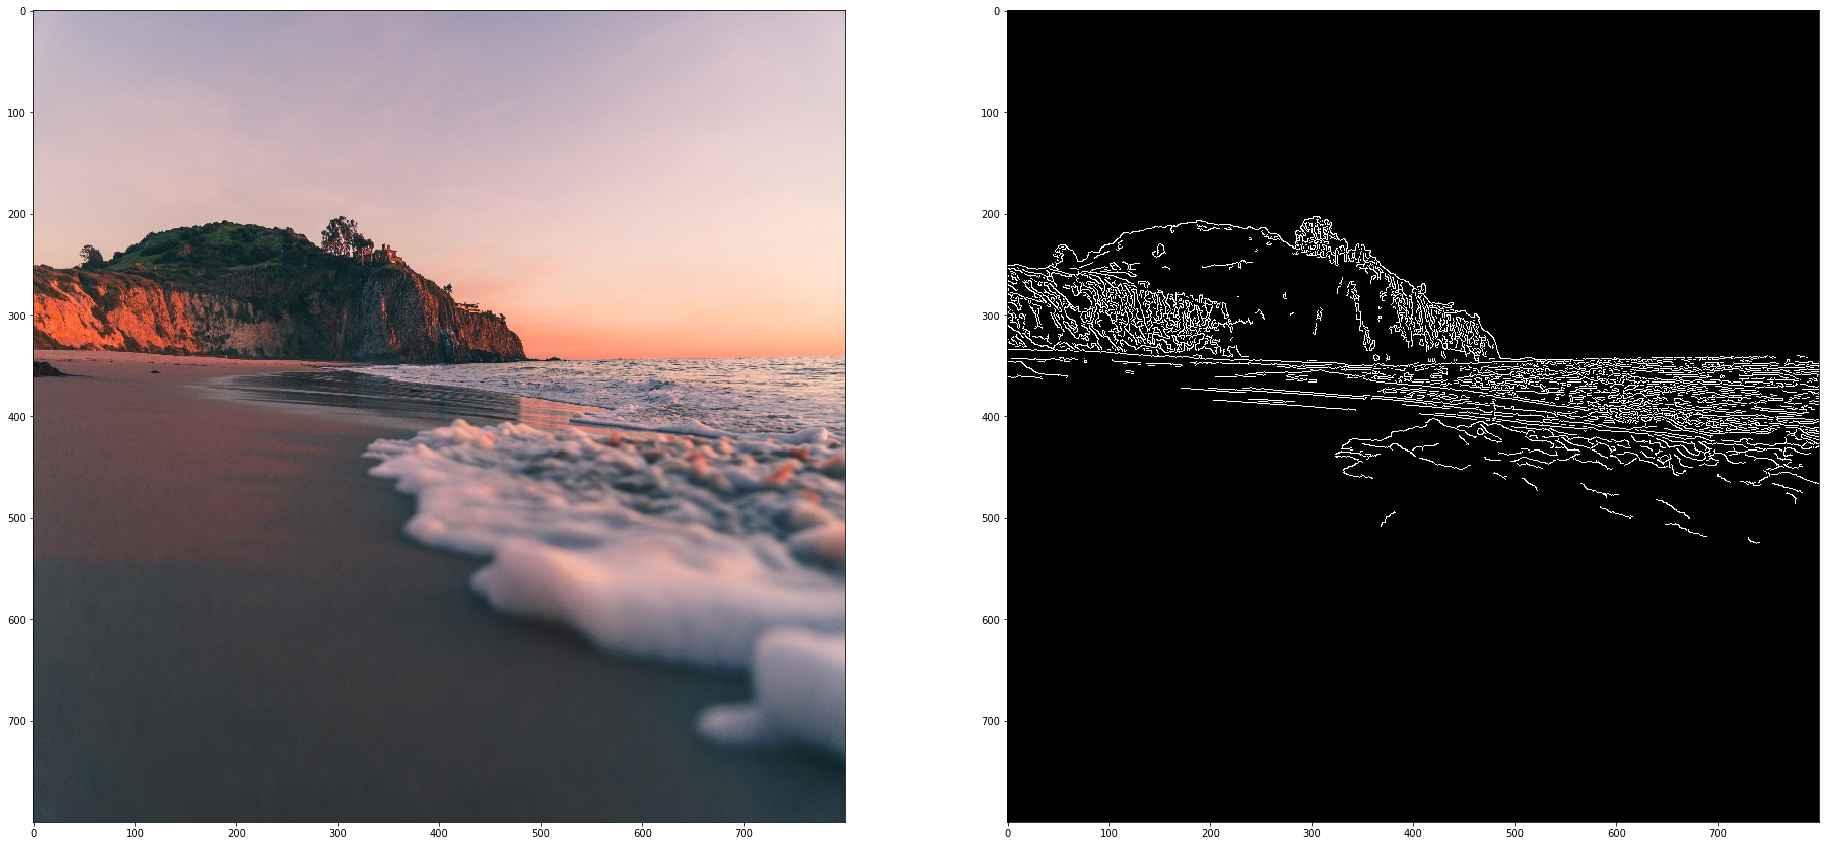

In [12]:
img = cv2.imread('example.jpg')
edge_img = cv2.Canny(img, 100, 200)
plt.figure(figsize=(32, 32))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))

### 7.转为灰度图

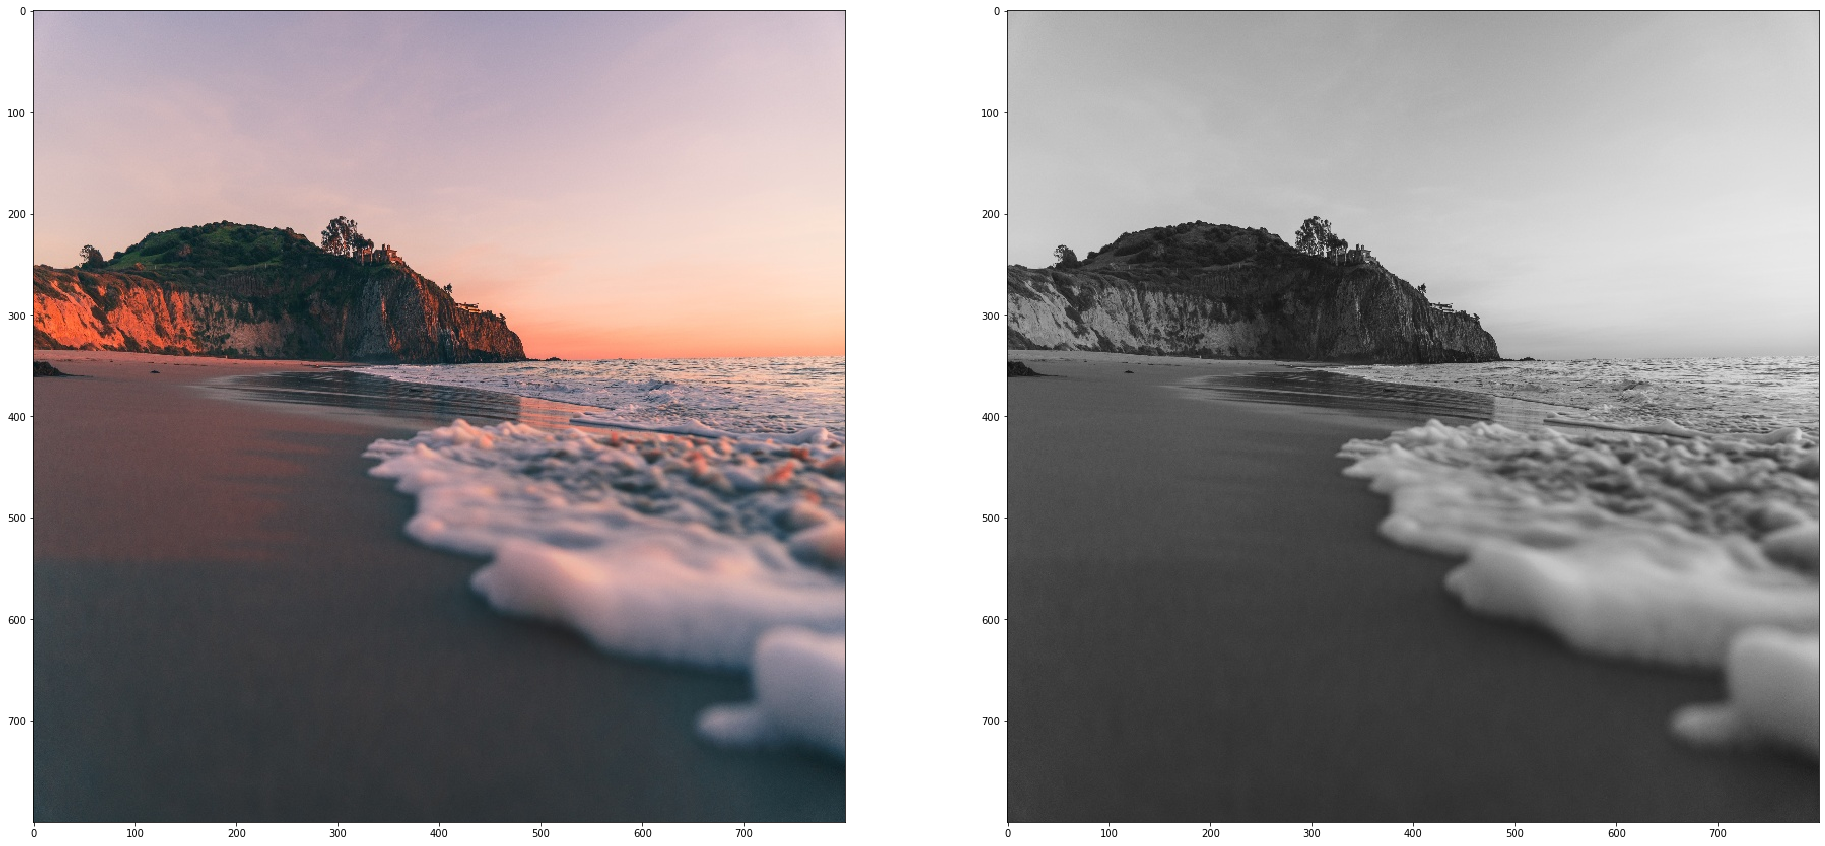

In [13]:
img = cv2.imread('example.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(32, 32))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

### 8.形心检测

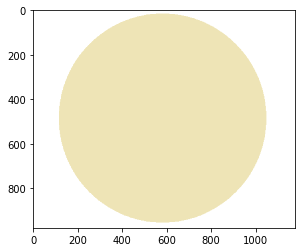

In [14]:
img = cv2.imread('circle.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

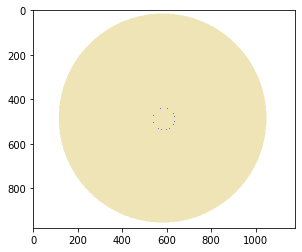

In [15]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
moment = cv2.moments(gray_img)
X = int(moment ["m10"] / moment["m00"])
Y = int(moment ["m01"] / moment["m00"])
cv2.circle(img, (X, Y), 50, (205, 114, 101), 1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 9. 对彩色图片采用蒙版（mask）

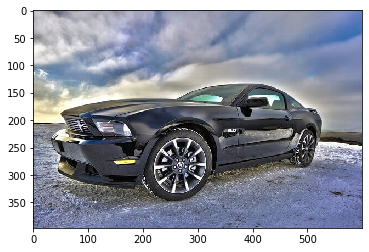

In [16]:
img = cv2.imread('car.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

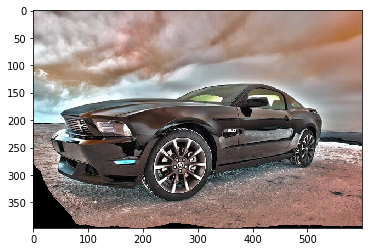

In [17]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=50, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

masking=np.full((img1.shape[0], img1.shape[1]),0,dtype=np.uint8)
for j in circles[0, :]:
    cv2.circle(masking, (j[0], j[1]), j[2], (255, 255, 255), -1)
final_img = cv2.bitwise_or(img1, img1, mask=masking)
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))

### 10.提取图片的文字（OCR）

In [30]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/tesseract'
img = cv2.imread('pytext.png')
pytesseract.image_to_string(img)

'LikeGeeks.com is a website\nwhich contains articles about\nLinux, programming, web\ndevelopment, 10S, Python and\nother tech tips.'

### 11.检测和修正歪曲的文字

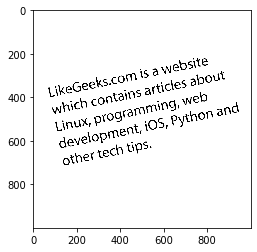

In [33]:
import cv2
import numpy as np

img = cv2.imread('Skewed-text-image.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

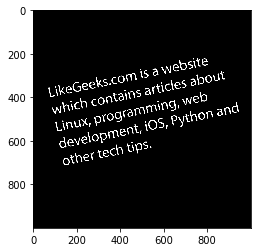

In [34]:
gray_img = cv2.bitwise_not(gray_img)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

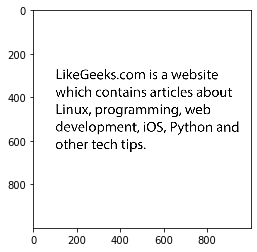

In [37]:
coordinates = np.column_stack(np.where(gray_img > 0))
ang=cv2.minAreaRect(coordinates)[-1]

if ang<-45:
    angle=-(90+ang)
else:
    angle=-ang

height, width = img.shape[:2]
center_img = (width / 2, height / 2)

rotationMatrix = cv2.getRotationMatrix2D(center_img, angle, 1.0)
rotated_img = cv2.warpAffine(img, rotationMatrix, (width, height), borderMode = cv2.BORDER_REFLECT)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))

### 12. 颜色检测

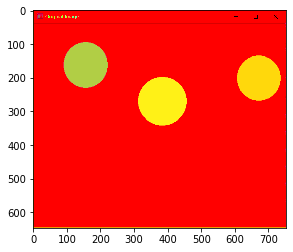

In [38]:
import cv2
import numpy as np

img = cv2.imread("pycolor.png")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_BGR2RGB))

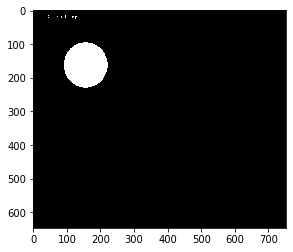

In [39]:
lower_green = np.array([34, 177, 76])
upper_green = np.array([255, 255, 255])

masking = cv2.inRange(hsv_img, lower_green, upper_green)
plt.imshow(cv2.cvtColor(masking, cv2.COLOR_BGR2RGB))

### 13. 去噪 

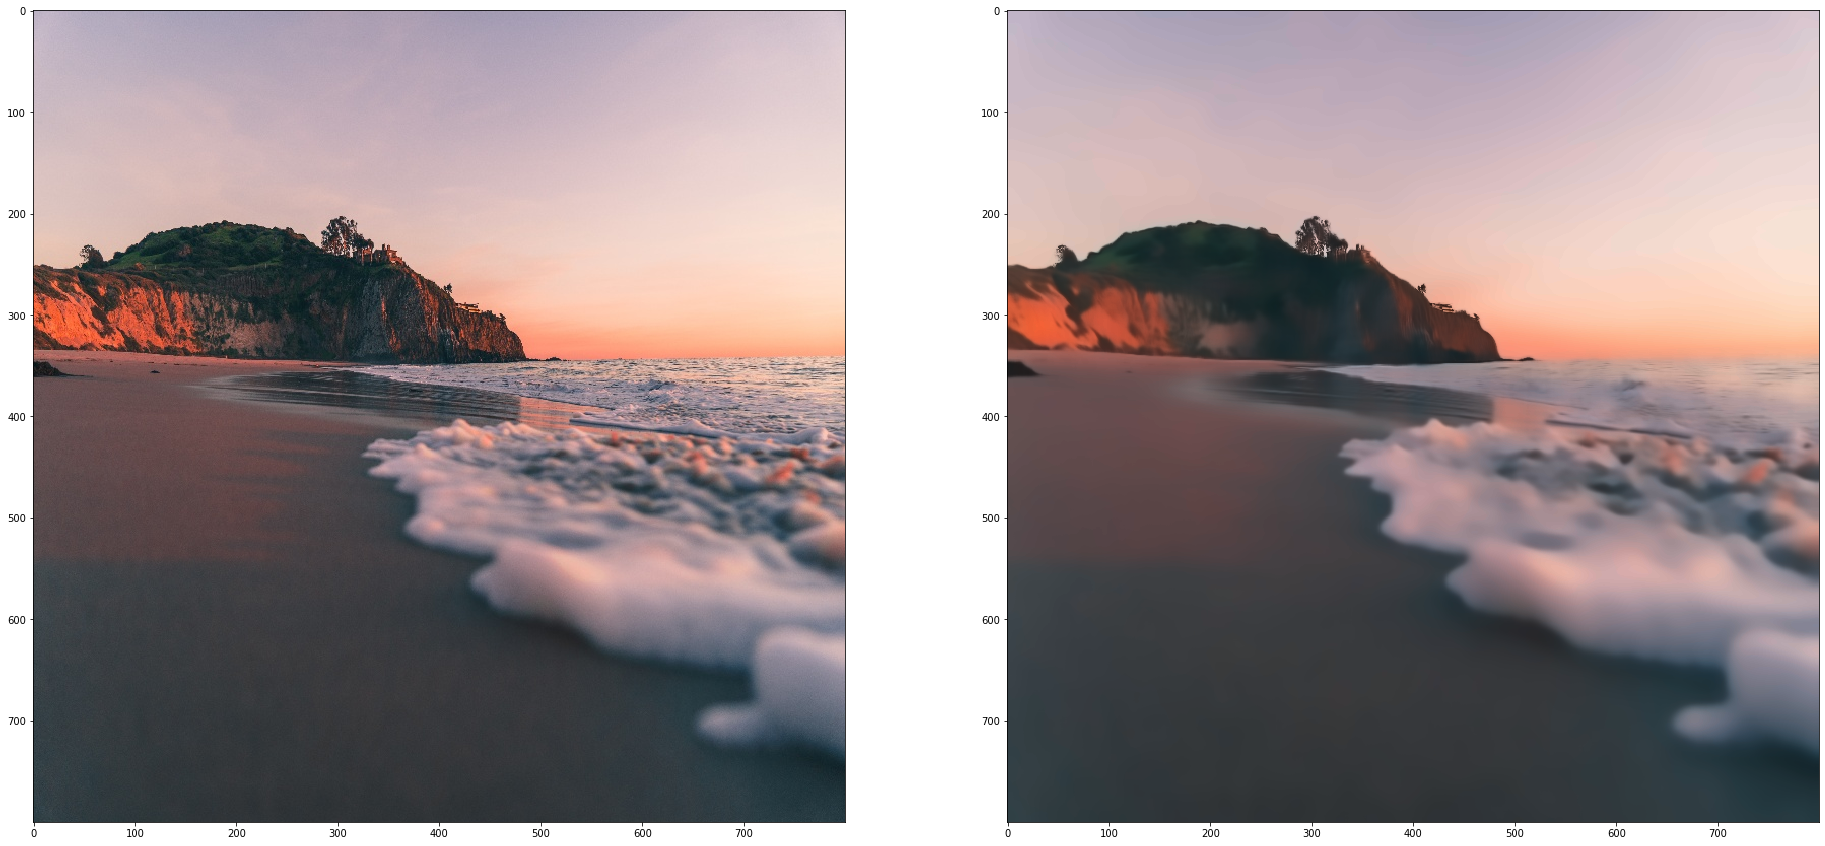

In [40]:
import cv2

img = cv2.imread('example.jpg')
result = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)

plt.figure(figsize=(32, 32))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

### 14. 检测图片的轮廓

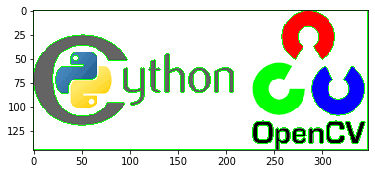

In [42]:
import cv2

img = cv2.imread('opencv_contour_example.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, thresh = cv2.threshold(gray_img, 127, 255, 0)
img_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, img_contours, -1, (0, 255, 0))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 15. 移除图片的背景

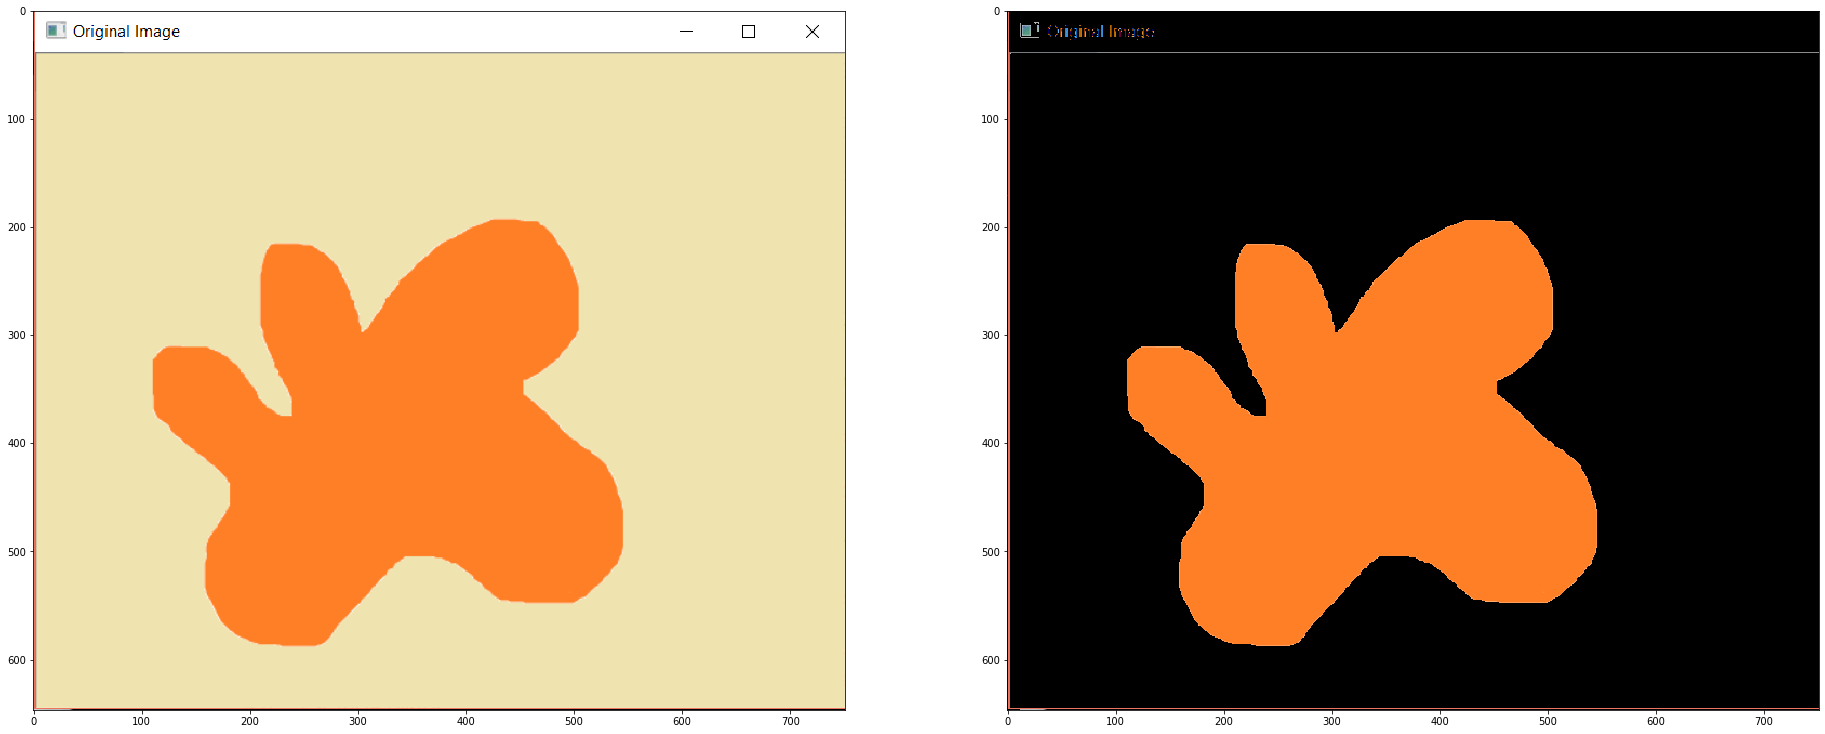

In [47]:
import cv2
import numpy as np

img = cv2.imread("opencv_bg.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
img_contours = sorted(img_contours, key=cv2.contourArea)

for i in img_contours:
    if cv2.contourArea(i) > 100:
        break
mask = np.zeros(img.shape[:2], np.uint8)
cv2.drawContours(mask, img_contours, -1, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(32, 32))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))